# Check why DTW different on old vs new historical data

In [2]:
from traffic.core import Traffic
import numpy as np

In [3]:
from cartes.crs import Lambert93

In [4]:
import matplotlib.pyplot as plt

# Plot the traffics

In [5]:
from traffic.core.mixins import PointMixin

In [78]:
def plot_traff(traff,sample = 0,point:list[PointMixin] = None,s:int = 5):
    with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            colors = ["blue","red","green","grey"]
            if isinstance(traff, list):
                  for i,t in enumerate(traff):
                        t.sample(sample).plot(ax, alpha = 0.2,color=colors[i%len(colors)]) if sample != 0 else  t.plot(ax, alpha = 0.2,color=colors[i%len(colors)])
            else:          
                traff.sample(sample).plot(ax, alpha = 0.2,color="#4c78a8") if sample != 0 else  traff.plot(ax, alpha = 0.2,color="#4c78a8")

            xlim = ax.get_xlim()
            ylim = ax.get_ylim()

            if point is not None :
                  for p in point:
                        p.plot(ax,s=5)

            ax.set_xlim(xlim)
            ax.set_ylim(ylim)
            plt.show()

In [7]:
t_final_A320 = Traffic.from_file("/data/data/arnault/data/final_data/TO_LFPO_final.pkl").aircraft_data().query('typecode == "A320"')

In [8]:
len(t_final_A320)

21732

In [9]:
t_train_A320 = Traffic.from_file("/data/data/arnault/data/final_data/TO_LFPO_test_final.pkl").aircraft_data().query('typecode == "A320"')

In [10]:
print(len(t_train_A320))

5569


In [11]:
t_f = t_final_A320 + t_train_A320

In [12]:
len(t_f)

27301

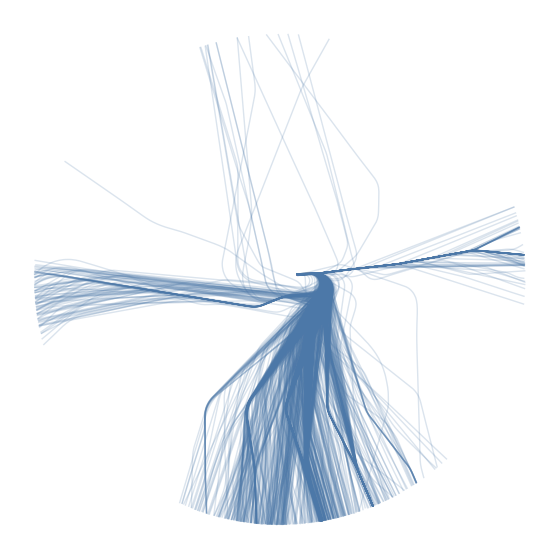

In [13]:
plot_traff(t_f,sample=1000)

In [14]:
t_old = Traffic.from_file("/data/data/arnault/data/final_data/TO_LFPO_test_old_A320.pkl")

In [15]:
print(len(t_old))

1627


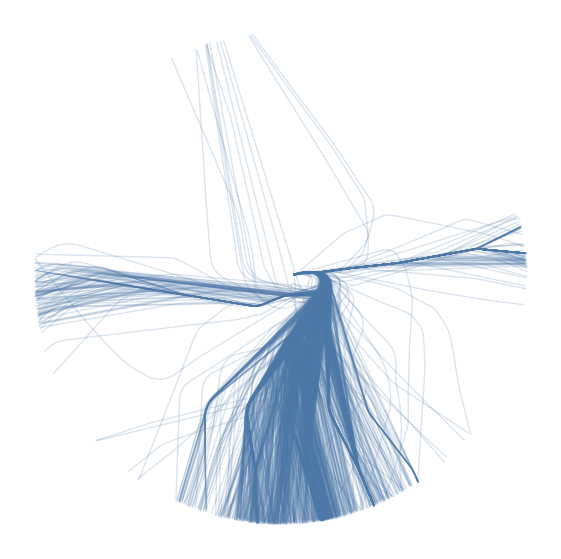

In [16]:
plot_traff(t_old)

In [17]:
max_date = t_old.end_time
min_date = t_old.start_time
max_date,min_date

(Timestamp('2022-07-30 04:23:32+0000', tz='UTC'),
 Timestamp('2022-06-01 19:16:32+0000', tz='UTC'))

In [18]:
def flight_between(f,start,end):
    if f.data["timestamp"].iloc[0]> start and f.data["timestamp"].iloc[-1]<end:
        return f
    return None

In [19]:
t_f_lim = t_f.pipe(flight_between,start = min_date,end = max_date).eval(desc="bounding time",max_workers=4)

bounding time:   0%|          | 0/27301 [00:00<?, ?it/s]

In [20]:
len(t_f_lim)

1524

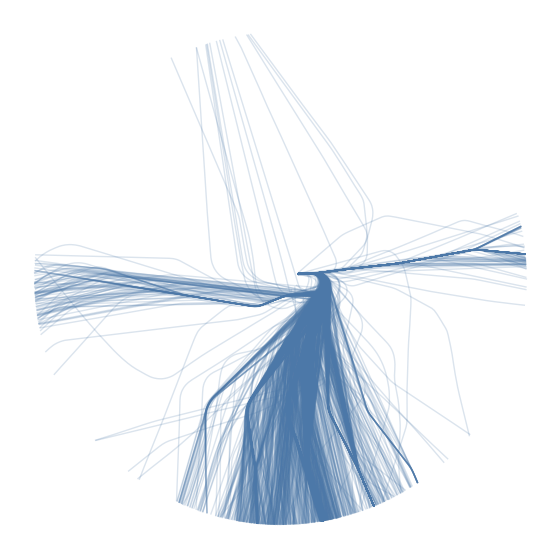

In [21]:
plot_traff(t_f_lim)

In [22]:
t_old.data.timedelta.max()

894

In [23]:
t_f_lim.data.timedelta.max()

882.0

In [24]:
t_old = t_old.assign_id().eval(desc='T')
print(t_old.flight_ids)
t_temp = t_f_lim.assign_id().eval(desc='T')
print(t_temp.flight_ids)

T:   0%|          | 0/1627 [00:00<?, ?it/s]

['AFR11EP_000', 'AFR11EP_001', 'AFR11EP_002', 'AFR11EP_003', 'AFR11EP_004', 'AFR11EP_005', 'AFR11EP_006', 'AFR11NJ_007', 'AFR11NJ_008', 'AFR11NJ_009', 'AFR11NJ_010', 'AFR11QM_011', 'AFR11QM_012', 'AFR12HN_013', 'AFR12HN_014', 'AFR12HN_015', 'AFR13FN_016', 'AFR14UJ_017', 'AFR14UJ_018', 'AFR14UJ_019', 'AFR17NT_020', 'AFR18GA_021', 'AFR18GA_022', 'AFR18GA_023', 'AFR18GA_024', 'AFR18ND_025', 'AFR21QH_026', 'AFR21QH_027', 'AFR21QH_028', 'AFR21QH_029', 'AFR21QH_030', 'AFR21QH_031', 'AFR21QH_032', 'AFR21QH_033', 'AFR21QH_034', 'AFR21QH_035', 'AFR21QH_036', 'AFR21QH_037', 'AFR23XN_038', 'AFR23XN_039', 'AFR23XN_040', 'AFR23XN_041', 'AFR23XN_042', 'AFR23XN_043', 'AFR25RC_044', 'AFR25RC_045', 'AFR25YM_046', 'AFR25YM_047', 'AFR25ZP_048', 'AFR25ZP_049', 'AFR25ZP_050', 'AFR27MR_051', 'AFR27MR_052', 'AFR27MR_053', 'AFR27MR_054', 'AFR27MR_055', 'AFR27MR_056', 'AFR28CY_057', 'AFR28CY_058', 'AFR28CY_059', 'AFR28CY_060', 'AFR28CY_061', 'AFR28CY_062', 'AFR28CY_063', 'AFR28CY_064', 'AFR28CY_065', 'AFR28PN_

T:   0%|          | 0/1524 [00:00<?, ?it/s]

['AFR11EP_000', 'AFR11EP_001', 'AFR11EP_002', 'AFR11EP_003', 'AFR11EP_004', 'AFR11EP_005', 'AFR11EP_006', 'AFR11EP_007', 'AFR11NJ_008', 'AFR11NJ_009', 'AFR11NJ_010', 'AFR11NJ_011', 'AFR11QM_012', 'AFR12HN_013', 'AFR12HN_014', 'AFR12HN_015', 'AFR13FN_016', 'AFR14UJ_017', 'AFR14UJ_018', 'AFR17NT_019', 'AFR18GA_020', 'AFR18GA_021', 'AFR18GA_022', 'AFR21QH_023', 'AFR21QH_024', 'AFR21QH_025', 'AFR21QH_026', 'AFR21QH_027', 'AFR21QH_028', 'AFR21QH_029', 'AFR21QH_030', 'AFR21QH_031', 'AFR21QH_032', 'AFR21QH_033', 'AFR21QH_034', 'AFR21QH_035', 'AFR23XN_036', 'AFR23XN_037', 'AFR23XN_038', 'AFR23XN_039', 'AFR23XN_040', 'AFR25RC_041', 'AFR25RC_042', 'AFR25YM_043', 'AFR25YM_044', 'AFR25ZP_045', 'AFR25ZP_046', 'AFR25ZP_047', 'AFR27MR_048', 'AFR27MR_049', 'AFR27MR_050', 'AFR27MR_051', 'AFR27MR_052', 'AFR27MR_053', 'AFR28CY_054', 'AFR28CY_055', 'AFR28CY_056', 'AFR28CY_057', 'AFR28CY_058', 'AFR28CY_059', 'AFR28CY_060', 'AFR28CY_061', 'AFR28PN_062', 'AFR28PN_063', 'AFR31KN_064', 'AFR31KN_065', 'AFR31KN_

In [25]:
t_temp = t_f_lim.assign_id().eval(desc='T')

T:   0%|          | 0/1524 [00:00<?, ?it/s]

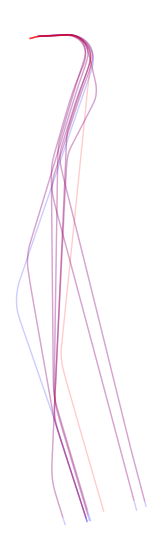

In [26]:
plot_traff([t_temp[[ 'AFR11EP_000', 'AFR11EP_001', 'AFR11EP_002', 'AFR11EP_003', 'AFR11EP_004', 'AFR11EP_005', 'AFR11EP_006', 'AFR11EP_007']],t_old[['AFR11EP_000', 'AFR11EP_001', 'AFR11EP_002', 'AFR11EP_003', 'AFR11EP_004', 'AFR11EP_005', 'AFR11EP_006','AFR11NJ_007']]])

In [27]:
t_temp[[ 'AFR11EP_005']].data

,timestamp,icao24,latitude,longitude,groundspeed,track,vertical_rate,callsign,onground,alert,...,hour,track_unwrapped,flight_id,RWY,to_start,dist_airp,distance,timedelta,registration,typecode
285000,2022-07-07 19:15:13+00:00,392ae4,48.739746,2.470797,167.0,75.797441,832.0,AFR11EP,0.0,0.0,...,2022-07-07 19:00:00+00:00,75.797441,AFR11EP_005,07,2022-07-07 19:13:57.228915662+00:00,3.760333,2.828672,0.0,F-GKXE,A320
285001,2022-07-07 19:15:15.793969849+00:00,392ae4,48.740158,2.474882,174.333333,81.087372,832.0,AFR11EP,0.0,0.0,...,<NA>,81.087372,AFR11EP_005,07,<NA>,3.923423,2.991774,2.79397,F-GKXE,A320
285002,2022-07-07 19:15:18.587939698+00:00,392ae4,48.740479,2.478614,179.5,83.103583,768.0,AFR11EP,0.0,0.0,...,<NA>,83.103583,AFR11EP_005,07,<NA>,4.071673,3.140064,5.58794,F-GKXE,A320
285003,2022-07-07 19:15:21.381909547+00:00,392ae4,48.740723,2.481798,183.666667,83.852181,853.333333,AFR11EP,0.0,0.0,...,<NA>,83.852181,AFR11EP_005,07,<NA>,4.197776,3.266225,8.38191,F-GKXE,A320
285004,2022-07-07 19:15:24.175879396+00:00,392ae4,48.740983,2.485475,188.333333,84.407341,896.0,AFR11EP,0.0,0.0,...,<NA>,84.407341,AFR11EP_005,07,<NA>,4.34316,3.4117,11.175879,F-GKXE,A320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285195,2022-07-07 19:24:17.824120603+00:00,392ae4,47.930712,2.592492,450.666667,162.516937,1728.0,AFR11EP,0.0,0.0,...,<NA>,162.516937,AFR11EP_005,07,<NA>,48.348346,48.438122,544.824121,F-GKXE,A320
285196,2022-07-07 19:24:20.618090452+00:00,392ae4,47.925777,2.594792,450.333333,162.651051,1728.0,AFR11EP,0.0,0.0,...,<NA>,162.651051,AFR11EP_005,07,<NA>,48.656294,48.745261,547.61809,F-GKXE,A320
285197,2022-07-07 19:24:23.412060301+00:00,392ae4,47.920362,2.597281,451.0,162.78973,1728.0,AFR11EP,0.0,0.0,...,<NA>,162.78973,AFR11EP_005,07,<NA>,48.994038,49.082156,550.41206,F-GKXE,A320
285198,2022-07-07 19:24:26.206030150+00:00,392ae4,47.914372,2.600027,452.0,162.887952,1770.666667,AFR11EP,0.0,0.0,...,<NA>,162.887952,AFR11EP_005,07,<NA>,49.367589,49.454785,553.20603,F-GKXE,A320


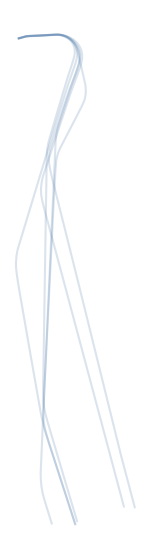

In [28]:
plot_traff(t_old[['AFR11EP_000', 'AFR11EP_001', 'AFR11EP_002', 'AFR11EP_003', 'AFR11EP_004', 'AFR11EP_005']])

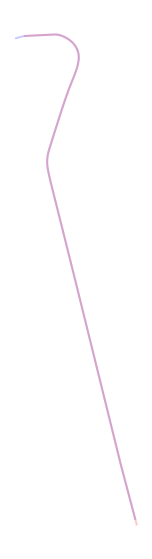

In [29]:
plot_traff([t_old['AFR11EP_001'],t_temp[[ 'AFR11EP_007']]])

In [30]:
t_old['AFR11EP_000'].data.iloc[-1]

timestamp          2022-07-12 18:52:54+00:00
altitude                             20800.0
callsign                             AFR11EP
groundspeed                            428.0
icao24                                392ae4
latitude                           47.912933
longitude                           2.601013
origin                                  LFPO
squawk                                  1000
track                             162.158329
vertical_rate                         1344.0
flight_id                        AFR11EP_000
distance                           49.546382
track_unwrapped                   162.158329
x                               21940.703712
y                             5326577.611489
timedelta                                604
registration                          F-GKXE
typecode                                A320
Name: 21799, dtype: object

In [31]:
t_temp[[ 'AFR11EP_006']].data.iloc[-1]

timestamp                                  2022-07-12 18:52:57+00:00
icao24                                                        392ae4
latitude                                                   47.908211
longitude                                                   2.603196
groundspeed                                                    429.0
track                                                     162.494547
vertical_rate                                                 1280.0
callsign                                                     AFR11EP
onground                                                         0.0
alert                                                            0.0
spi                                                              0.0
squawk                                                          1000
altitude                                                     20950.0
geoaltitude                                                  22250.0
lastcontact                       

way less trajectories from the north

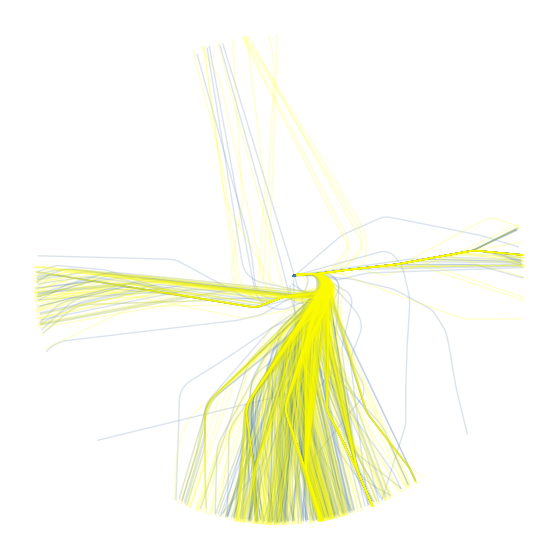

In [ ]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            t_old.sample(500).plot(ax, alpha = 0.1,color="#4c78a8")
            t_new.sample(500).plot(ax, alpha = 0.1,color="yellow")
            plt.show()

## check distance distrib

In [32]:
import pickle
all_true_dist = "/home/arnault/traffic/data_orly/results/distances/all/test_dist.pkl"
with open(all_true_dist, "rb") as f:
        og_distance = pickle.load(f)

In [33]:
new_distance = {k:og_distance[k] for k in t_f_lim.flight_ids if k in og_distance.keys()  }

In [34]:
len(new_distance)

178

In [35]:
def plot_DTW_SSPD(distances: list[dict], labels: list[str]) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
    # DTW

    for label, dist in zip(labels, distances):
        sorted_d = np.sort([d["dtw"] for d in dist.values()])
        cdf = np.arange(1, len(sorted_d) + 1) / len(sorted_d)
        axes[0].plot(sorted_d, cdf, label=label)

    axes[0].set_title("DTW")
    axes[0].set_xlabel("Distance")
    axes[0].set_ylabel("Cumulative probability")
    axes[0].legend(title="Generation method")
    axes[0].grid(True)
    axes[0].set_xlim(0, 1200000)

    for label, dist in zip(labels, distances):
        sorted_d = np.sort([d["sspd"] for d in dist.values()])
        cdf = np.arange(1, len(sorted_d) + 1) / len(sorted_d)
        axes[1].plot(sorted_d, cdf, label=label)

    axes[1].set_title("SSPD")
    axes[1].set_xlabel("Distance")
    axes[1].set_ylabel("Cumulative probability")
    axes[1].legend(title="Generation method")
    axes[1].grid(True)
    axes[1].set_xlim(0, 16000)

    plt.tight_layout()
    plt.show()

In [36]:
all_true_dist = "/home/arnault/traffic/data_orly/results/distances/all/dist_A320_old_data.pkl"
with open(all_true_dist, "rb") as f:
        old_distance = pickle.load(f)

In [37]:
old_computed_dist = "/home/arnault/traffic/data_orly/results/distances/d_TO_7_Real_more_points.pkl"
with open(old_computed_dist, "rb") as f:
        dist_prev = pickle.load(f)

In [38]:
t_true_old = Traffic.from_file("/data/data/arnault/data/final_data/TO_LFPO_test_old_A320.pkl")

In [39]:
len(t_true_old),len(dist_prev)

(1627, 7328)

In [40]:
dist_ol_tec = {k:dist_prev[k] for k in t_true_old.flight_ids if k in dist_prev.keys()}

In [41]:
len(dist_ol_tec)

1602

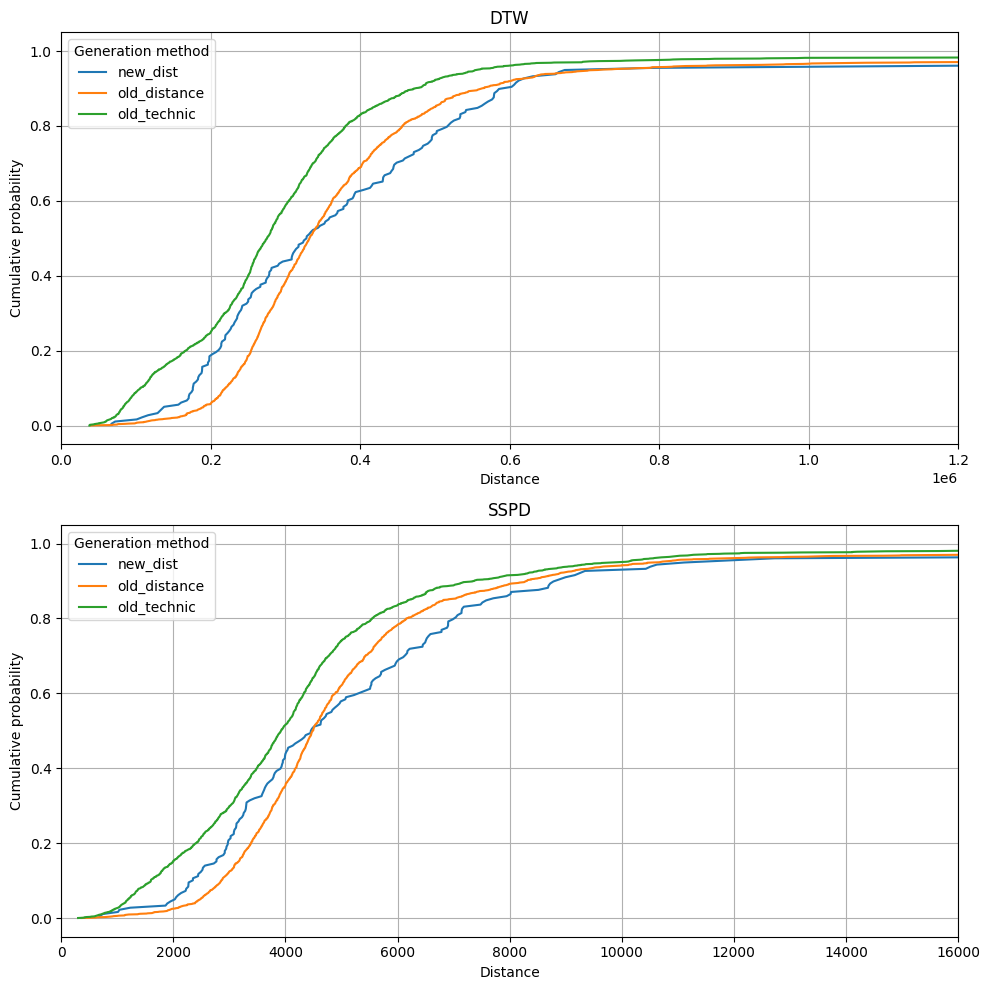

In [42]:
plot_DTW_SSPD(distances=[new_distance,old_distance,dist_ol_tec],labels=['new_dist','old_distance','old_technic'])

In [43]:
dist_ol_tec_small = {k:value for k,value in dist_ol_tec.items() if value["dtw"] < 200000}

In [44]:
len(dist_ol_tec_small)

399

In [45]:
old_distance_small = {k:value for k,value in old_distance.items() if value["dtw"] < 200000}

In [46]:
len(old_distance_small)

93

In [47]:
keys_spec = [key for key in dist_ol_tec_small.keys() if key not in old_distance_small.keys()]

In [48]:
print(len(keys_spec))

309


In [49]:
import statistics

In [50]:
statistics.mean([dist_ol_tec[k]["dtw"] for k  in keys_spec]),statistics.median([dist_ol_tec[k]["dtw"] for k  in keys_spec])

(117596.96288793, 113618.45811766622)

In [51]:
statistics.mean([old_distance[k]["dtw"] for k  in keys_spec ]),statistics.median([old_distance[k]["dtw"] for k  in keys_spec ])

(439211.0948908524, 387821.57456762367)

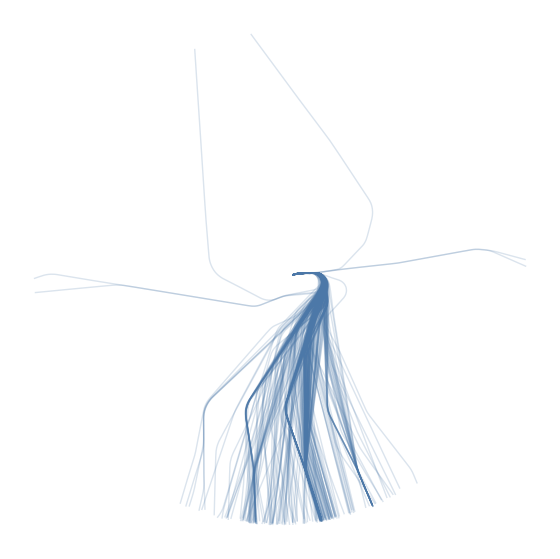

In [52]:
plot_traff(t_true_old[keys_spec])

In [53]:
old_sim = Traffic.from_file("/home/arnault/traffic/data_orly/results/simulated_traff/simulated_lfpo7.pkl")

In [54]:
old_sim=old_sim.assign(callsign = old_sim.data['flight_id'])
old_sim=old_sim.assign(icao24 = old_sim.data['flight_id'])

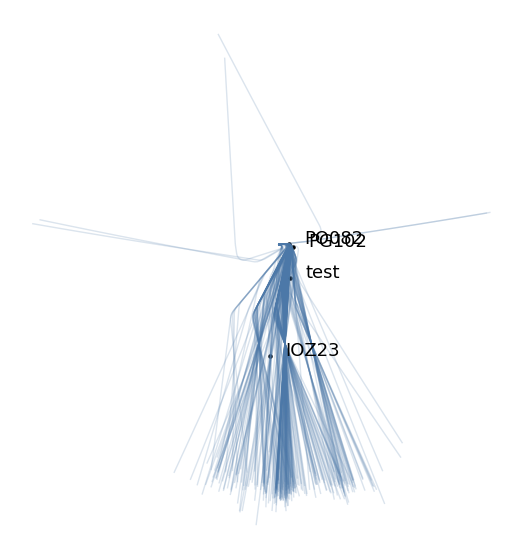

In [127]:
plot_traff(old_sim[keys_spec],point = points)

In [56]:
import pandas as pd
from datetime import datetime, time, timedelta, timezone

In [57]:
def read_csv_log_file(
     path: str, flight_ids_paths: str = ""
    ) -> Traffic:
        """
        Return the reconstructed traffic from the simulation log file.
        Takes in account the flight for which simulation was impossible
        """
        # reading the data
        data = pd.read_csv(
            path,
            sep=",",
            header=None,
            names=[
                "timedelta",
                "latitude",
                "longitude",
                "altitude",
                "groundspeed",
            ],
            skiprows=2,
        )

        with open(flight_ids_paths, "rb") as f:
            flight_ids = pickle.load(f)

        print(flight_ids)
        print(data)
        num_flight = len(data[data["timedelta"] == 0])
        # check if we have the exact sam enumber of point for each flight
        if len(data) % num_flight != 0:
            print(len(data) % num_flight)
            data = data.iloc[: len(data) - (len(data) % num_flight)]
        new_df = pd.concat(
            [data.iloc[i::num_flight] for i in range(num_flight)],
            ignore_index=True,
        )

        len_flight = len(data) // num_flight
        flight_list = flight_ids  # keeping the right order
        f_ids = [
            flight_list[i // len_flight] for i in range(len(new_df))
        ]  # getting the list of flight ids
        new_df["flight_id"] = f_ids
        new_df["timestamp"] = datetime(
            year=2025, month=1, day=1, tzinfo=timezone.utc
        ) + pd.to_timedelta(new_df["timedelta"], unit="s")
        new_df["altitude"] = new_df["altitude"] * 3.28084  # from meters to feet
        new_df["groundspeed"] = new_df["groundspeed"] * 1.94384  # M/S to KTS
        f_traff = Traffic(new_df)
        
        return f_traff

In [58]:
new_sim =  read_csv_log_file("/home/arnault/traffic/data_orly/sim_logs/all/A320_old.log","/home/arnault/traffic/data_orly/scn/final_data/A320_old_denied_flight.pkl")

['AFR11EP_108', 'AFR11EP_109', 'AFR11EP_127', 'AFR11EP_128', 'AFR11EP_129', 'AFR11EP_130', 'AFR11EP_131', 'AFR11NJ_132', 'AFR11NJ_150', 'AFR11NJ_151', 'AFR11NJ_152', 'AFR11QM_168', 'AFR11QM_169', 'AFR12HN_171', 'AFR12HN_172', 'AFR12HN_173', 'AFR13FN_181', 'AFR14UJ_182', 'AFR14UJ_190', 'AFR14UJ_191', 'AFR17NT_196', 'AFR18GA_197', 'AFR18GA_212', 'AFR18GA_213', 'AFR18GA_214', 'AFR18ND_219', 'AFR21QH_231', 'AFR21QH_233', 'AFR21QH_234', 'AFR21QH_235', 'AFR21QH_236', 'AFR21QH_237', 'AFR21QH_238', 'AFR21QH_239', 'AFR21QH_240', 'AFR21QH_241', 'AFR21QH_242', 'AFR23XN_261', 'AFR23XN_262', 'AFR23XN_266', 'AFR23XN_267', 'AFR23XN_268', 'AFR23XN_269', 'AFR25RC_276', 'AFR25RC_277', 'AFR25YM_278', 'AFR25YM_289', 'AFR25ZP_306', 'AFR25ZP_307', 'AFR27MR_323', 'AFR27MR_324', 'AFR27MR_325', 'AFR27MR_326', 'AFR27MR_327', 'AFR27MR_328', 'AFR28CY_329', 'AFR28CY_346', 'AFR28CY_347', 'AFR28CY_348', 'AFR28CY_349', 'AFR28CY_350', 'AFR28CY_351', 'AFR28CY_352', 'AFR28CY_353', 'AFR28PN_354', 'AFR28PN_375', 'AFR31KN_

In [59]:
new_sim=new_sim.assign(callsign = new_sim.data['flight_id'])
new_sim=new_sim.assign(icao24 = new_sim.data['flight_id'])

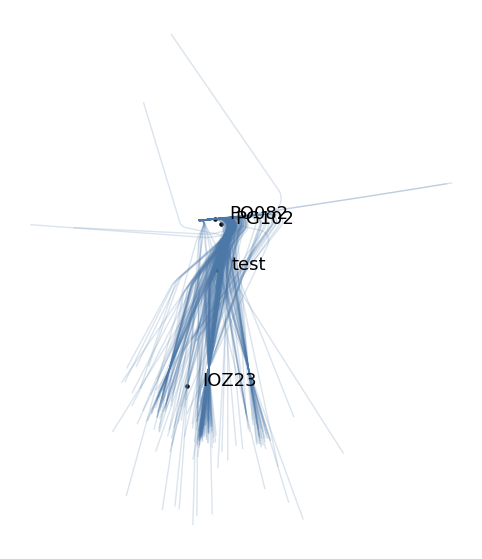

In [126]:
plot_traff(new_sim[keys_spec],point = points)

In [61]:
print(keys_spec)

['AFR11EP_109', 'AFR11EP_128', 'AFR11EP_131', 'AFR11NJ_152', 'AFR11QM_169', 'AFR12HN_171', 'AFR12HN_172', 'AFR12HN_173', 'AFR13FN_181', 'AFR14UJ_182', 'AFR18GA_213', 'AFR21QH_231', 'AFR21QH_239', 'AFR23XN_266', 'AFR23XN_268', 'AFR27MR_324', 'AFR27MR_325', 'AFR27MR_327', 'AFR28CY_329', 'AFR28CY_348', 'AFR28CY_350', 'AFR28CY_352', 'AFR28CY_353', 'AFR31KN_388', 'AFR31KN_389', 'AFR31KN_391', 'AFR34VR_396', 'AFR36EF_421', 'AFR36EF_423', 'AFR36EF_433', 'AFR36EF_434', 'AFR36EF_436', 'AFR36EF_437', 'AFR36EF_440', 'AFR36EF_442', 'AFR37QK_465', 'AFR37QK_467', 'AFR41BW_480', 'AFR41BW_481', 'AFR41BW_482', 'AFR41SM_496', 'AFR43BD_534', 'AFR43GF_535', 'AFR43GF_549', 'AFR43GF_550', 'AFR43QL_551', 'AFR43QL_558', 'AFR44TQ_559', 'AFR44XF_568', 'AFR45PN_570', 'AFR45PN_571', 'AFR45PN_585', 'AFR45PN_588', 'AFR45WB_604', 'AFR45WB_605', 'AFR47LN_652', 'AFR47LN_653', 'AFR47PD_654', 'AFR48DJ_676', 'AFR48DJ_678', 'AFR48JP_700', 'AFR48JP_702', 'AFR48UC_705', 'AFR49EU_712', 'AFR49SN_746', 'AFR53SM_758', 'AFR53SM_

In [151]:
pt_t = PointMixin()
pt_t.latitude, pt_t.longitude =  (48.55336,2.5264)
pt_t.name = "test"

In [ ]:
pt_t.plot()

In [63]:
from traffic.data import navaids

In [65]:
print(navaids['PO082'])

Navaid('PO082', type='FIX', latitude=48.74286111, longitude=2.54888889)


In [152]:
points = [navaids['PO082'],navaids['IOZ23'], navaids['POLLY'],navaids['PG102'],pt_t]

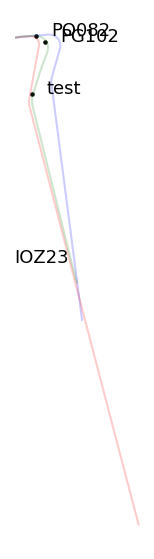

In [153]:
plot_traff([new_sim['AFR11EP_109'],old_sim['AFR11EP_109'],t_true_old['AFR11EP_109']],point=points)

In [82]:
import sys  # noqa: I001
import os

from tqdm import tqdm

CURRENT_PATH = os.getcwd()
path = "/home/arnault/traffic"
sys.path.append(os.path.abspath(CURRENT_PATH))
sys.path.append(os.path.abspath(path))
print("Current working directory:", CURRENT_PATH)


Current working directory: /home/arnault/traffic/data_orly/sandbox


In [166]:
import importlib

NameError: name 'data_orly' is not defined

In [184]:
from data_orly.src.simulation import Simulator,navpoints_table,gen_instruct_f

In [169]:
import data_orly.src.simulation as sim

In [213]:
importlib.reload(sim)

<module 'data_orly.src.simulation' from '/home/arnault/traffic/data_orly/src/simulation.py'>

In [203]:
import data_orly.src.simulation as si

In [86]:
nav = navpoints_table(t_true_old['AFR11EP_109'])

In [146]:
nav2 = navpoints_table(t_f_lim['AFR11EP_82399'])

In [214]:
print(sim.gen_instruct_f(t_f_lim['AFR11EP_82399'],nav2,path_log = "test.log",typecode= "A320"))

2022-07-21 19:02:22.005025125+00:00
2022-07-21 19:01:29+00:00
16
199.48958333333331 3766.1458333333335
2022-07-21 19:05:06.909547738+00:00
2022-07-21 19:02:22.005025125+00:00
54
281.5679012345679 7707.638888888889
2022-07-21 19:10:10.216080402+00:00
2022-07-21 19:05:06.909547738+00:00
101
374.7079207920792 16246.245874587457
{'PO082': {'spd': 199.48958333333331, 'alt': 3766.1458333333335, 'timestamp': Timestamp('2022-07-21 19:01:29+0000', tz='UTC')}, 'OBAMO': {'spd': 281.5679012345679, 'alt': 7707.638888888889, 'timestamp': Timestamp('2022-07-21 19:02:22.005025125+0000', tz='UTC')}, 'POLLY': {'spd': 374.7079207920792, 'alt': 16246.245874587457, 'timestamp': Timestamp('2022-07-21 19:05:06.909547738+0000', tz='UTC')}, 'end': {'spd': 407.65079365079373, 'alt': 22302.380952380954, 'timestamp': Timestamp('2022-07-21 19:10:10.216080402+0000', tz='UTC')}}
0:00:00>CRE AFR11EP_82399, A320, 48.73997497558594, 2.4711491511418266, 81.96834390551625, 3766.1458333333335, 199.48958333333331 
0:00:00>

In [150]:
t_f_lim['AFR11EP_82399'].query('timedelta > 217').data

,timestamp,icao24,latitude,longitude,groundspeed,track,vertical_rate,callsign,onground,alert,...,hour,track_unwrapped,flight_id,RWY,to_start,dist_airp,distance,timedelta,registration,typecode
285274,2022-07-21 19:05:06.909547738+00:00,392ae4,48.559288,2.536499,319.0,197.214999,1088.0,AFR11EP,0.0,0.0,...,<NA>,197.214999,AFR11EP_82399,07,<NA>,11.665324,11.424038,217.909548,F-GKXE,A320
285275,2022-07-21 19:05:09.854271356+00:00,392ae4,48.554367,2.534203,322.333333,197.124628,981.333333,AFR11EP,0.0,0.0,...,<NA>,197.124628,AFR11EP_82399,07,<NA>,11.868331,11.644493,220.854271,F-GKXE,A320
285276,2022-07-21 19:05:12.798994974+00:00,392ae4,48.550685,2.532603,326.333333,196.32683,1002.666667,AFR11EP,0.0,0.0,...,<NA>,196.32683,AFR11EP_82399,07,<NA>,12.025565,11.814113,223.798995,F-GKXE,A320
285277,2022-07-21 19:05:15.743718592+00:00,392ae4,48.547079,2.531243,330.0,194.532507,1109.333333,AFR11EP,0.0,0.0,...,<NA>,194.532507,AFR11EP_82399,07,<NA>,12.18592,11.985757,226.743719,F-GKXE,A320
285278,2022-07-21 19:05:18.688442211+00:00,392ae4,48.542858,2.530049,333.666667,190.093169,1450.666667,AFR11EP,0.0,0.0,...,<NA>,190.093169,AFR11EP_82399,07,<NA>,12.383697,12.195343,229.688442,F-GKXE,A320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285395,2022-07-21 19:11:03.221105527+00:00,392ae4,47.955508,2.745549,410.666667,165.038601,1365.333333,AFR11EP,0.0,0.0,...,<NA>,165.038601,AFR11EP_82399,07,<NA>,48.374336,48.341853,574.221106,F-GKXE,A320
285396,2022-07-21 19:11:06.165829145+00:00,392ae4,47.947998,2.748505,412.0,165.086505,1280.0,AFR11EP,0.0,0.0,...,2022-07-21 19:00:00+00:00,165.086505,AFR11EP_82399,07,2022-07-21 19:00:17.550200803+00:00,48.840224,48.808073,577.165829,F-GKXE,A320
285397,2022-07-21 19:11:09.110552763+00:00,392ae4,47.94266,2.750596,414.0,165.157773,1280.0,AFR11EP,0.0,0.0,...,2022-07-21 19:00:00+00:00,165.157773,AFR11EP_82399,07,2022-07-21 19:00:17.550200803+00:00,49.171252,49.139339,580.110553,F-GKXE,A320
285398,2022-07-21 19:11:12.055276381+00:00,392ae4,47.938517,2.752216,414.0,165.157773,1280.0,AFR11EP,0.0,0.0,...,2022-07-21 19:00:00+00:00,165.157773,AFR11EP_82399,07,2022-07-21 19:00:17.550200803+00:00,49.428145,49.396417,583.055276,F-GKXE,A320


In [147]:
nav2.data

,start,stop,duration,navaid,distance,name,type,latitude,longitude,flight_id,callsign,icao24,registration,typecode,coverage,latitude_0,longitude_0,altitude_0,track_0,groundspeed_0
0,2022-07-21 19:01:34.889447236+00:00,2022-07-21 19:02:22.005025125+00:00,0 days 00:00:47.115577889,PO082,0.201158,PO082,FIX,48.742861,2.548889,AFR11EP_82399,AFR11EP,392ae4,F-GKXE,A320,0.703518,48.739975,2.471149,3225.0,81.968344,165.0
1,2022-07-21 19:03:29.733668341+00:00,2022-07-21 19:05:06.909547738+00:00,0 days 00:01:37.175879397,OBAMO,6.241418,OBAMO,FIX,48.460472,2.487944,AFR11EP_82399,AFR11EP,392ae4,F-GKXE,A320,0.703518,48.739975,2.471149,3225.0,81.968344,165.0
2,2022-07-21 19:05:42.246231155+00:00,2022-07-21 19:10:10.216080402+00:00,0 days 00:04:27.969849247,POLLY,9.761335,POLLY,FIX,47.893611,2.762222,AFR11EP_82399,AFR11EP,392ae4,F-GKXE,A320,0.703518,48.739975,2.471149,3225.0,81.968344,165.0


In [ ]:
f = t_true_old['AFR11EP_109']

In [ ]:
f.at()

In [132]:
t_true_old.query('timedelta >= 0')['AFR11EP_109'].data

,timestamp,altitude,callsign,groundspeed,icao24,latitude,longitude,origin,squawk,track,vertical_rate,flight_id,distance,track_unwrapped,x,y,timedelta,registration,typecode
21800,2022-07-21 19:01:10+00:00,2500.0,AFR11EP,163.0,392ae4,48.736283,2.449156,LFPO,1000,74.68314,2304.0,AFR11EP_109,1.944853,74.68314,18444.721575,5418982.40076,0,F-GKXE,A320
21801,2022-07-21 19:01:14+00:00,2650.0,AFR11EP,163.0,392ae4,48.737045,2.453191,LFPO,1000,74.68314,2304.0,AFR11EP_109,2.111514,74.68314,18748.444245,5419041.531474,4,F-GKXE,A320
21802,2022-07-21 19:01:16+00:00,2725.0,AFR11EP,163.0,392ae4,48.737411,2.455374,LFPO,1000,74.68314,2304.0,AFR11EP_109,2.200932,74.68314,18912.343251,5419068.371535,6,F-GKXE,A320
21803,2022-07-21 19:01:20+00:00,2875.0,AFR11EP,163.0,392ae4,48.738238,2.459853,LFPO,1000,74.68314,2304.0,AFR11EP_109,2.385626,74.68314,19249.338475,5419131.777098,10,F-GKXE,A320
21804,2022-07-21 19:01:22+00:00,2950.0,AFR11EP,163.0,392ae4,48.738647,2.462135,LFPO,1000,74.68314,2240.0,AFR11EP_109,2.479509,74.68314,19420.862183,5419162.835594,12,F-GKXE,A320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,2022-07-21 19:10:58+00:00,22775.0,AFR11EP,409.0,392ae4,47.965622,2.74157,LFPO,1000,164.978339,1600.0,AFR11EP_109,47.714062,164.978339,32913.605849,5331566.277827,588,F-GKXE,A320
21996,2022-07-21 19:11:00+00:00,22825.0,AFR11EP,410.0,392ae4,47.961136,2.743286,LFPO,1000,165.014564,1472.0,AFR11EP_109,47.991978,165.014564,33001.090709,5331057.536684,590,F-GKXE,A320
21997,2022-07-21 19:11:04+00:00,22900.0,AFR11EP,411.0,392ae4,47.953739,2.74623,LFPO,1000,165.050619,1344.0,AFR11EP_109,48.45149,165.050619,33153.856852,5330218.072073,594,F-GKXE,A320
21998,2022-07-21 19:11:06+00:00,22950.0,AFR11EP,412.0,392ae4,47.949783,2.747818,LFPO,1000,165.086505,1280.0,AFR11EP_109,48.69743,165.086505,33236.606874,5329768.981085,596,F-GKXE,A320


In [90]:
nav.data

,start,stop,duration,navaid,distance,name,type,latitude,longitude,flight_id,callsign,icao24,registration,typecode,coverage,latitude_0,longitude_0,altitude_0,track_0,groundspeed_0
0,2022-07-21 19:01:34+00:00,2022-07-21 19:02:22+00:00,0 days 00:00:48,PO082,0.201158,PO082,FIX,48.742861,2.548889,AFR11EP_109,AFR11EP,392ae4,F-GKXE,A320,0.72,48.736283,2.449156,2500.0,74.68314,163.0
1,2022-07-21 19:03:22+00:00,2022-07-21 19:05:18+00:00,0 days 00:01:56,IOZ23,33.069850,IOZ23,FIX,48.003417,2.374806,AFR11EP_109,AFR11EP,392ae4,F-GKXE,A320,0.72,48.736283,2.449156,2500.0,74.68314,163.0
2,2022-07-21 19:05:42+00:00,2022-07-21 19:10:10+00:00,0 days 00:04:28,POLLY,9.805168,POLLY,FIX,47.893611,2.762222,AFR11EP_109,AFR11EP,392ae4,F-GKXE,A320,0.72,48.736283,2.449156,2500.0,74.68314,163.0


In [217]:
t_start = t_f_lim['AFR11EP_82399'].start
t_first = t_start
dic = {}
for _,n_p in nav2.data.iterrows():
    print(n_p.stop)
    print(t_first)
    t_small = t_f_lim['AFR11EP_82399'].after(t_first).before(n_p.stop)
    print(len(t_small))
    mean_speed = t_small.data["groundspeed"].mean()
    mean_alt = t_small.data["altitude"].mean()
    dic[n_p.navaid] = (mean_speed,mean_alt)
    t_first = n_p.stop





2022-07-21 19:02:22.005025125+00:00
2022-07-21 19:01:29+00:00
16
2022-07-21 19:05:06.909547738+00:00
2022-07-21 19:02:22.005025125+00:00
54
2022-07-21 19:10:10.216080402+00:00
2022-07-21 19:05:06.909547738+00:00
101


In [218]:
dic

{'PO082': (199.48958333333331, 3766.1458333333335),
 'OBAMO': (281.5679012345679, 7707.638888888889),
 'POLLY': (374.7079207920792, 16246.245874587457)}

In [84]:
s = Simulator(t_true_old['AFR11EP_109'])

In [ ]:
nav = s.navpoints_table()

In [155]:
t_f_lim.flight_ids

['AFR11EP_160706',
 'AFR11EP_163811',
 'AFR11EP_163812',
 'AFR11EP_168942',
 'AFR11EP_173669',
 'AFR11EP_82397',
 'AFR11EP_82398',
 'AFR11EP_82399',
 'AFR11NJ_160708',
 'AFR11NJ_163818',
 'AFR11NJ_173676',
 'AFR11NJ_82403',
 'AFR11QM_167006',
 'AFR12HN_161607',
 'AFR12HN_161608',
 'AFR12HN_163837',
 'AFR13FN_168999',
 'AFR14UJ_163904',
 'AFR14UJ_82419',
 'AFR17NT_163976',
 'AFR18GA_158794',
 'AFR18GA_171525',
 'AFR18GA_82429',
 'AFR21QH_164070',
 'AFR21QH_166137',
 'AFR21QH_167250',
 'AFR21QH_169225',
 'AFR21QH_169226',
 'AFR21QH_169229',
 'AFR21QH_173844',
 'AFR21QH_82433',
 'AFR21QH_82434',
 'AFR21QH_82435',
 'AFR21QH_82436',
 'AFR21QH_82437',
 'AFR21QH_82996',
 'AFR23XN_164105',
 'AFR23XN_166158',
 'AFR23XN_171632',
 'AFR23XN_82442',
 'AFR23XN_83039',
 'AFR25RC_161983',
 'AFR25RC_167314',
 'AFR25YM_169338',
 'AFR25YM_82448',
 'AFR25ZP_162022',
 'AFR25ZP_162023',
 'AFR25ZP_167343',
 'AFR27MR_160840',
 'AFR27MR_162038',
 'AFR27MR_164198',
 'AFR27MR_169361',
 'AFR27MR_173900',
 'AFR27M

In [183]:
t_true_old['AFR11EP_109'].query("timedelta > 106").data

,timestamp,altitude,callsign,groundspeed,icao24,latitude,longitude,origin,squawk,track,vertical_rate,flight_id,distance,track_unwrapped,x,y,timedelta,registration,typecode
21836,2022-07-21 19:02:58+00:00,5325.0,AFR11EP,279.0,392ae4,48.721851,2.599423,LFPO,1000,146.252978,3264.0,AFR11EP_109,7.847313,146.252978,29349.581347,5416437.537454,108,F-GKXE,A320
21837,2022-07-21 19:03:02+00:00,5525.0,AFR11EP,279.0,392ae4,48.71715,2.60282,LFPO,1000,155.181791,3264.0,AFR11EP_109,7.999282,155.181791,29555.238209,5415894.257205,112,F-GKXE,A320
21838,2022-07-21 19:03:04+00:00,5625.0,AFR11EP,279.0,392ae4,48.715118,2.60383,LFPO,1000,159.683986,3264.0,AFR11EP_109,8.04971,159.683986,29610.470045,5415662.388959,114,F-GKXE,A320
21839,2022-07-21 19:03:08+00:00,5850.0,AFR11EP,279.0,392ae4,48.710129,2.605591,LFPO,1000,168.407825,3328.0,AFR11EP_109,8.152442,168.407825,29693.209157,5415097.278317,118,F-GKXE,A320
21840,2022-07-21 19:03:10+00:00,5975.0,AFR11EP,277.0,392ae4,48.707062,2.606084,LFPO,1000,174.824289,3328.0,AFR11EP_109,8.197522,174.824289,29700.764014,5414753.564994,120,F-GKXE,A320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,2022-07-21 19:10:58+00:00,22775.0,AFR11EP,409.0,392ae4,47.965622,2.74157,LFPO,1000,164.978339,1600.0,AFR11EP_109,47.714062,164.978339,32913.605849,5331566.277827,588,F-GKXE,A320
21996,2022-07-21 19:11:00+00:00,22825.0,AFR11EP,410.0,392ae4,47.961136,2.743286,LFPO,1000,165.014564,1472.0,AFR11EP_109,47.991978,165.014564,33001.090709,5331057.536684,590,F-GKXE,A320
21997,2022-07-21 19:11:04+00:00,22900.0,AFR11EP,411.0,392ae4,47.953739,2.74623,LFPO,1000,165.050619,1344.0,AFR11EP_109,48.45149,165.050619,33153.856852,5330218.072073,594,F-GKXE,A320
21998,2022-07-21 19:11:06+00:00,22950.0,AFR11EP,412.0,392ae4,47.949783,2.747818,LFPO,1000,165.086505,1280.0,AFR11EP_109,48.69743,165.086505,33236.606874,5329768.981085,596,F-GKXE,A320


# Generated


In [20]:
t_gen = Traffic.from_file("/home/arnault/traffic/data_orly/src/generation/saved_traff/test_all/CVAE_full_A320_010_B738_A321_A319_A20N_A318_A21N_A320_A359_E145_A333_A320_1000_2000.pkl")

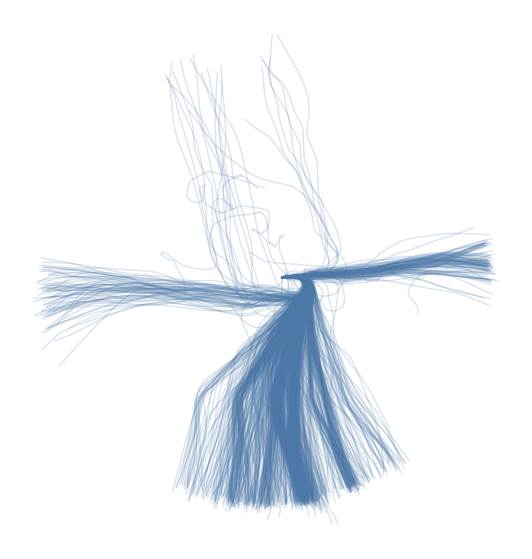

In [21]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            t_gen.sample(1000).plot(ax, alpha = 0.2,color="#4c78a8")
            plt.show()

In [22]:
t_gen_vae = Traffic.from_file("/home/arnault/traffic/data_orly/src/generation/saved_traff/test_all/VAE_A320_010_A320__1000_2000.pkl")

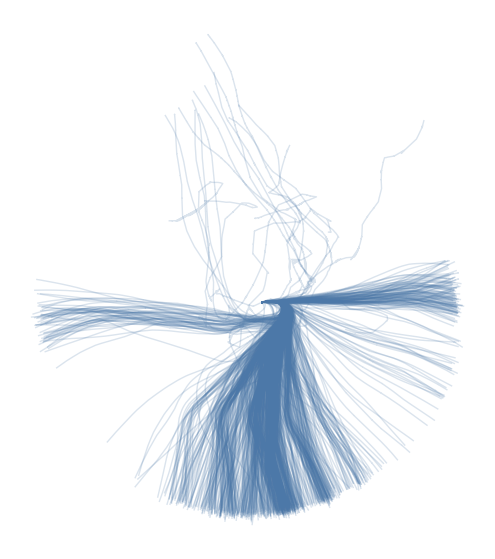

In [23]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            t_gen_vae.sample(1000).plot(ax, alpha = 0.2,color="#4c78a8")
            plt.show()

# Which trajectories have bad DTW in our test/train data

Approximately 10% of our trajectories have distances between 6000 and 8000 DTW we want to see which 

In [25]:
import pickle

In [98]:
all_true_dist = "/home/arnault/traffic/data_orly/results/distances/all/test_dist.pkl"
with open(all_true_dist, "rb") as f:
        og_distance = pickle.load(f)

In [99]:
t_all = Traffic.from_file("/data/data/arnault/data/final_data/TO_LFPO_test_final_sub_samp.pkl")
t_all = t_all.query("typecode == 'A320'")

 16%|█▌        | 544/3500 [31:14<2:49:46,  3.45s/it]


In [111]:
print(len(t_all))

3500


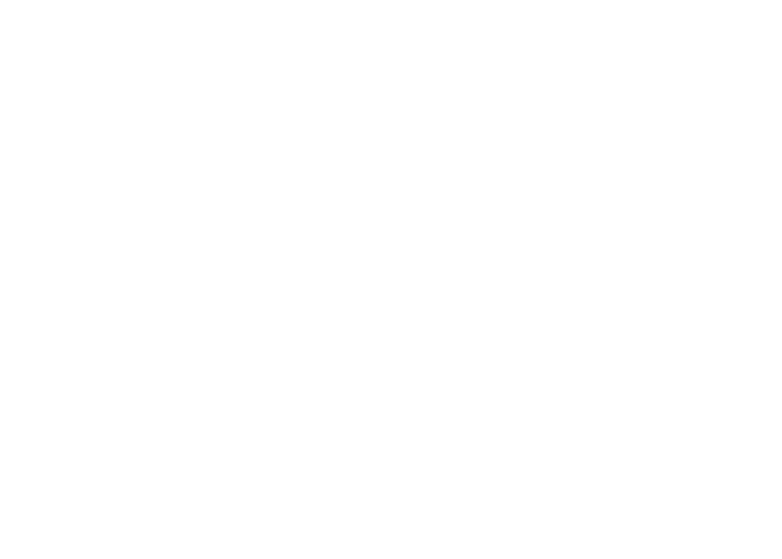

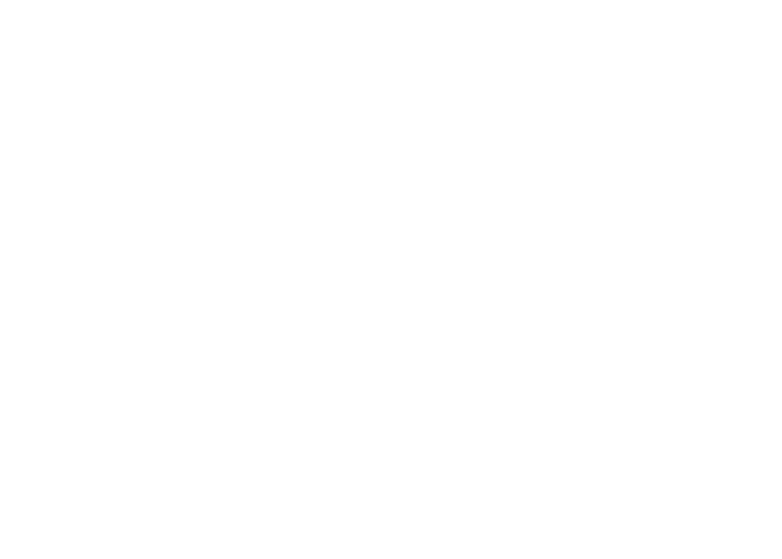

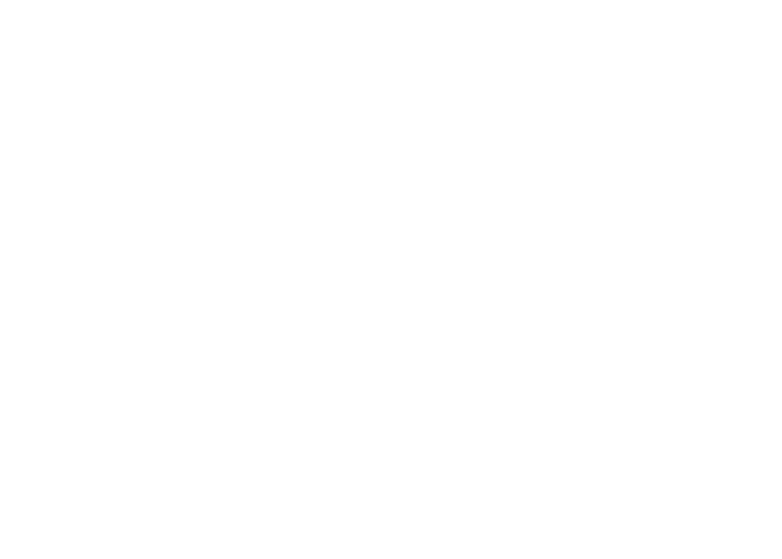

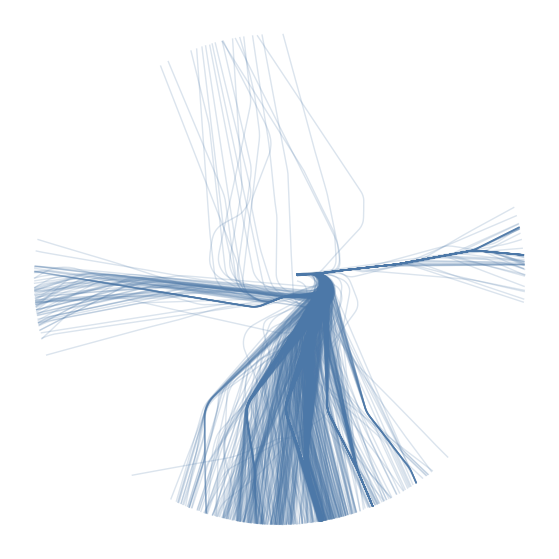

In [100]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            t_all.sample(1000).plot(ax, alpha = 0.2,color="#4c78a8")
            plt.show()

## Let's how the old data and new data differs in the trajectories that have a high DTW

In [101]:
f_id = t_all.flight_ids

In [102]:
from tqdm import tqdm
new_dist = {k:og_distance[k] for k in tqdm(f_id) if k in og_distance.keys()}

100%|██████████| 3500/3500 [00:00<00:00, 1325633.38it/s]


In [103]:
max_dtw = 1200000  # to see how different are the traff, why do we have more errors, why we have more errors for the new one
min_dtw = 600000
flight_over = [
    k for k, value in new_dist.items() if min_dtw < value["dtw"] < max_dtw
]

In [104]:
print(len(flight_over))
print(len(flight_over)/len(new_dist))

338
0.09732219982723869


AFR16XT_173456


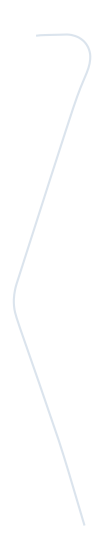

In [137]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            t_all[flight_over][9].plot(ax, alpha = 0.2,color="#4c78a8")
            print(t_all[flight_over][9].flight_id)
            plt.show()

Show simulated

In [84]:
import pandas as pd
from datetime import datetime, time, timedelta, timezone

In [115]:
#show reconsturcted 
f_traff = read_csv_log_file("/home/arnault/traffic/data_orly/sim_logs/all/log_all.log","/home/arnault/traffic/data_orly/scn/final_data/final_train_denied_flight.pkl")

['963V_227403', 'A7HHJ_17103', 'AEA10LN_25898', 'AEA10LN_35205', 'AEA10LN_35209', 'AEA10LN_64913', 'AEA10LN_64915', 'AEA10LN_70062', 'AEA1298_34589', 'AEA1298_77397', 'AEA16LV_34594', 'AEA20FB_66490', 'AEA20FB_70380', 'AEA20FB_70386', 'AEA21DJ_37705', 'AEA21DJ_55733', 'AEA21DJ_55974', 'AEA21DJ_64934', 'AEA21DJ_66500', 'AEA27AV_37223', 'AEA27AV_37525', 'AEA27AV_55755', 'AEA37YM_34622', 'AEA37YM_34810', 'AEA37YM_55983', 'AEA37YM_55990', 'AEA37YM_55997', 'AEA37YM_64755', 'AEA37YM_64950', 'AEA37YM_70094', 'AEA37YM_70106', 'AEA39BV_34624', 'AEA39BV_34631', 'AEA39BV_35037', 'AEA39BV_35040', 'AEA41HG_34636', 'AEA41HG_34821', 'AEA41HG_37252', 'AEA41HG_77632', 'AEA41HG_77779', 'AEA43TN_35050', 'AEA43TN_77781', 'AEA43TN_77789', 'AEA47LD_35276', 'AEA47LD_35278', 'AEA47LD_37264', 'AEA47LD_37556', 'AEA49SG_70278', 'AEA49SG_75772', 'AEA49YM_55804', 'AEA49YM_64965', 'AEA49YM_64967', 'AEA49YM_70284', 'AEA49YM_70293', 'AEA50UN_64783', 'AEA50UN_70296', 'AEA51JT_36943', 'AEA51JT_37576', 'AEA53MK_35094', 

In [116]:
print(len(f_traff))

13832


In [ ]:
f_traff = f_traff.assign(icao24 =f_traff.data["flight_id"])
f_traff = f_traff.assign(callsign =f_traff.data["flight_id"])

In [121]:
print(f_traff.flight_ids)

['963V_227403', 'A7HHJ_17103', 'AEA10LN_25898', 'AEA10LN_35205', 'AEA10LN_35209', 'AEA10LN_64913', 'AEA10LN_64915', 'AEA10LN_70062', 'AEA1298_34589', 'AEA1298_77397', 'AEA16LV_34594', 'AEA20FB_66490', 'AEA20FB_70380', 'AEA20FB_70386', 'AEA21DJ_37705', 'AEA21DJ_55733', 'AEA21DJ_55974', 'AEA21DJ_64934', 'AEA21DJ_66500', 'AEA27AV_37223', 'AEA27AV_37525', 'AEA27AV_55755', 'AEA37YM_34622', 'AEA37YM_34810', 'AEA37YM_55983', 'AEA37YM_55990', 'AEA37YM_55997', 'AEA37YM_64755', 'AEA37YM_64950', 'AEA37YM_70094', 'AEA37YM_70106', 'AEA39BV_34624', 'AEA39BV_34631', 'AEA39BV_35037', 'AEA39BV_35040', 'AEA41HG_34636', 'AEA41HG_34821', 'AEA41HG_37252', 'AEA41HG_77632', 'AEA41HG_77779', 'AEA43TN_35050', 'AEA43TN_77781', 'AEA43TN_77789', 'AEA47LD_35276', 'AEA47LD_35278', 'AEA47LD_37264', 'AEA47LD_37556', 'AEA49SG_70278', 'AEA49SG_75772', 'AEA49YM_55804', 'AEA49YM_64965', 'AEA49YM_64967', 'AEA49YM_70284', 'AEA49YM_70293', 'AEA50UN_64783', 'AEA50UN_70296', 'AEA51JT_36943', 'AEA51JT_37576', 'AEA53MK_35094', 

AFR16XT_173456


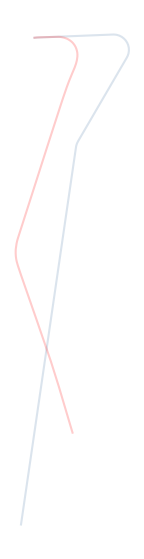

In [138]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            f_traff[flight_over][9].plot(ax, alpha = 0.2,color="#4c78a8")
            t_all[flight_over][9].plot(ax, alpha = 0.2,color="red")
            print(f_traff[flight_over][9].flight_id)
            plt.show()


In [141]:
pd.set_option('display.max_columns', None)

In [144]:
t_all.data.columns

Index(['timestamp', 'icao24', 'latitude', 'longitude', 'groundspeed', 'track',
       'vertical_rate', 'callsign', 'onground', 'alert', 'spi', 'squawk',
       'altitude', 'geoaltitude', 'lastcontact', 'serials', 'hour',
       'track_unwrapped', 'flight_id', 'RWY', 'to_start', 'dist_airp',
       'distance', 'timedelta', 'registration', 'typecode', 'simple'],
      dtype='object')

In [150]:
print(t_all[flight_over][9].query("timedelta >=180").data.head(5))

                                  timestamp  icao24   latitude  longitude  \
135060  2021-05-29 05:06:14.713567839+00:00  3985aa  48.610519   2.562561   
135061  2021-05-29 05:06:17.758793969+00:00  3985aa    48.6064   2.560589   
135062  2021-05-29 05:06:20.804020100+00:00  3985aa  48.602631    2.55873   
135063  2021-05-29 05:06:23.849246231+00:00  3985aa  48.597264   2.556146   
135064  2021-05-29 05:06:26.894472361+00:00  3985aa  48.593635   2.554405   

        groundspeed       track  vertical_rate callsign  onground  alert  spi  \
135060        292.0  197.938894         2304.0  AFR16XT       0.0    0.0  0.0   
135061        293.0  197.878697         2176.0  AFR16XT       0.0    0.0  0.0   
135062        295.0  197.944205         2048.0  AFR16XT       0.0    0.0  0.0   
135063   296.666667  197.845298    2154.666667  AFR16XT       0.0    0.0  0.0   
135064   298.333333   197.74715         2240.0  AFR16XT       0.0    0.0  0.0   

       squawk     altitude   geoaltitude        la

In [148]:
print(f_traff[flight_over][9].query("timedelta >60").data.head(5))

       timedelta   latitude  longitude     altitude  groundspeed  \
90447       65.0  48.743154   2.558747  4083.333464   235.332586   
90448       70.0  48.743414   2.567488  4083.333464   235.332586   
90449       75.0  48.743674   2.576229  4083.333464   235.332586   
90450       80.0  48.743934   2.584970  4083.333464   235.332586   
90451       85.0  48.744194   2.593711  4083.333464   235.332586   

            flight_id                 timestamp          icao24  \
90447  AFR16XT_173456 2025-01-01 00:01:05+00:00  AFR16XT_173456   
90448  AFR16XT_173456 2025-01-01 00:01:10+00:00  AFR16XT_173456   
90449  AFR16XT_173456 2025-01-01 00:01:15+00:00  AFR16XT_173456   
90450  AFR16XT_173456 2025-01-01 00:01:20+00:00  AFR16XT_173456   
90451  AFR16XT_173456 2025-01-01 00:01:25+00:00  AFR16XT_173456   

             callsign  
90447  AFR16XT_173456  
90448  AFR16XT_173456  
90449  AFR16XT_173456  
90450  AFR16XT_173456  
90451  AFR16XT_173456  


# OLD data


In [151]:
f_id = t_old.flight_ids

In [152]:
all_true_dist = "/home/arnault/traffic/data_orly/results/distances/all/dist_A320_old_data.pkl"
with open(all_true_dist, "rb") as f:
        og_distance = pickle.load(f)

In [153]:
new_dist = {k:og_distance[k] for k in tqdm(f_id) if k in og_distance.keys()}

100%|██████████| 1627/1627 [00:00<00:00, 2176062.69it/s]


In [154]:
len(new_dist)

1602

In [176]:
max_dtw = 1200000  # to see how different are the traff, why do we have more errors, why we have more errors for the new one
min_dtw = 600000
flight_over = [
    k for k, value in new_dist.items() if min_dtw < value["dtw"] < max_dtw
]

In [168]:
print(len(flight_over))
print(len(flight_over)/len(new_dist))

93
0.05805243445692884


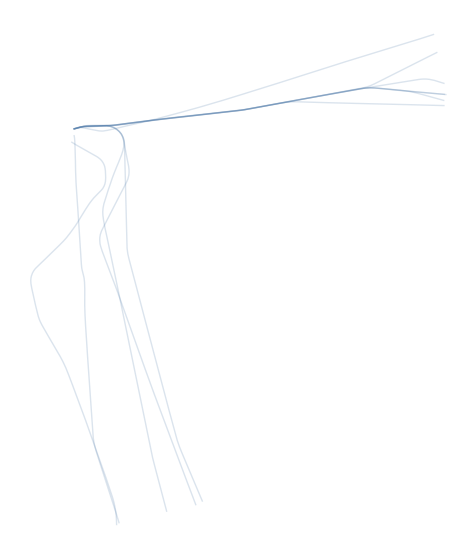

In [165]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            t_old[flight_over].plot(ax, alpha = 0.2,color="#4c78a8")
            plt.show()

In [158]:
f_traff = read_csv_log_file("/home/arnault/traffic/data_orly/sim_logs/all/A320_old.log","/home/arnault/traffic/data_orly/scn/final_data/A320_old_denied_flight.pkl")

['AFR11EP_108', 'AFR11EP_109', 'AFR11EP_127', 'AFR11EP_128', 'AFR11EP_129', 'AFR11EP_130', 'AFR11EP_131', 'AFR11NJ_132', 'AFR11NJ_150', 'AFR11NJ_151', 'AFR11NJ_152', 'AFR11QM_168', 'AFR11QM_169', 'AFR12HN_171', 'AFR12HN_172', 'AFR12HN_173', 'AFR13FN_181', 'AFR14UJ_182', 'AFR14UJ_190', 'AFR14UJ_191', 'AFR17NT_196', 'AFR18GA_197', 'AFR18GA_212', 'AFR18GA_213', 'AFR18GA_214', 'AFR18ND_219', 'AFR21QH_231', 'AFR21QH_233', 'AFR21QH_234', 'AFR21QH_235', 'AFR21QH_236', 'AFR21QH_237', 'AFR21QH_238', 'AFR21QH_239', 'AFR21QH_240', 'AFR21QH_241', 'AFR21QH_242', 'AFR23XN_261', 'AFR23XN_262', 'AFR23XN_266', 'AFR23XN_267', 'AFR23XN_268', 'AFR23XN_269', 'AFR25RC_276', 'AFR25RC_277', 'AFR25YM_278', 'AFR25YM_289', 'AFR25ZP_306', 'AFR25ZP_307', 'AFR27MR_323', 'AFR27MR_324', 'AFR27MR_325', 'AFR27MR_326', 'AFR27MR_327', 'AFR27MR_328', 'AFR28CY_329', 'AFR28CY_346', 'AFR28CY_347', 'AFR28CY_348', 'AFR28CY_349', 'AFR28CY_350', 'AFR28CY_351', 'AFR28CY_352', 'AFR28CY_353', 'AFR28PN_354', 'AFR28PN_375', 'AFR31KN_

In [159]:
f_traff = f_traff.assign(icao24 =f_traff.data["flight_id"])
f_traff = f_traff.assign(callsign =f_traff.data["flight_id"])

AFR45PN_585
AFR45PN_585


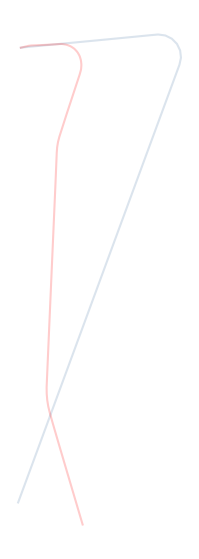

In [177]:
with plt.style.context("traffic"):
            fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
            f_traff[flight_over][9].plot(ax, alpha = 0.2,color="#4c78a8")
            t_old[flight_over][9].plot(ax, alpha = 0.2,color="red")
            print(f_traff[flight_over][9].flight_id)
            print(t_old[flight_over][9].flight_id)
            plt.show()